In [1]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.0 MB/s eta 0:00:00


In [2]:
!pip install insightface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 91.9 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1057280 sha256=323eddf92744af908aba5c1887157773ecc08e85317d4b5753e18401d20bfd87
  Stored in directory: /root/.cache/pip/wheels/27/d8/22/f52d858d16cd06e7b2e6aad34a1777dcfaf000be833bbf8146
Successfully built insightface


In [3]:
from google.colab import files
from IPython.display import display
from google.colab.patches import cv2_imshow
import numpy as np
import insightface
from insightface.app import FaceAnalysis
import cv2
from insightface.utils import face_align

In [4]:
print("Incarcati o imagine de test")
uploaded_test_image_1 = files.upload()  # Allows user to upload a file
# Get the first uploaded file
uploaded_test_image_1_path = list(uploaded_test_image_1.keys())[0]

Incarcati o imagine de test


Saving Mel_Gibson_Cannes_2016_2.jpg to Mel_Gibson_Cannes_2016_2.jpg


In [5]:
print("Incarcati o imagine de test")
uploaded_test_image_2 = files.upload()  # Allows user to upload a file
# Get the first uploaded file
uploaded_test_image_2_path = list(uploaded_test_image_2.keys())[0]

Incarcati o imagine de test


Saving Mel_Gibson_1990.jpg to Mel_Gibson_1990.jpg


In [12]:
img1 = cv2.imread(uploaded_test_image_1_path)
img2 = cv2.imread(uploaded_test_image_2_path)

In [7]:
app = FaceAnalysis(allowed_modules=['detection', 'recognition'])
app.prepare(ctx_id=0)

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:03<00:00, 74180.58KB/s]
/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [8]:
faces1 = app.get(img1)
faces2 = app.get(img2)

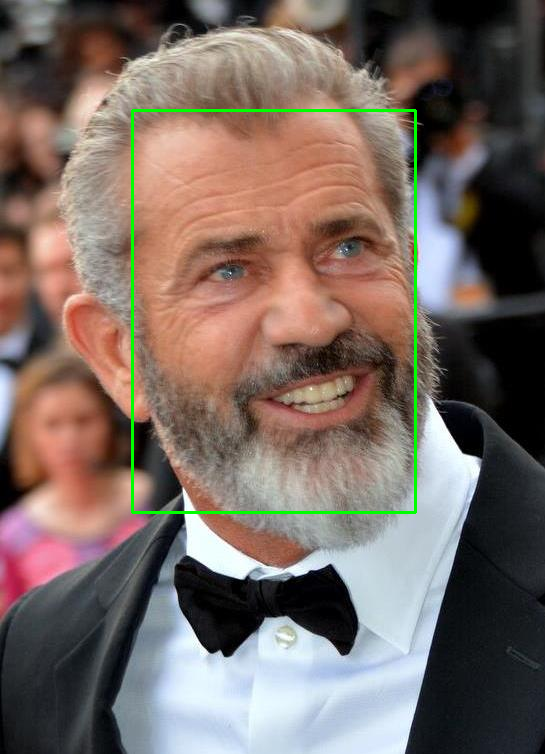

In [13]:
# for face in faces1:
bbox = faces1[0]['bbox']  # Get bounding box
     #print("Detected face:", face)

     # Draw rectangle: (x1, y1) -> (x2, y2)
cv2.rectangle(img1, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), 2)

cv2_imshow(img1)

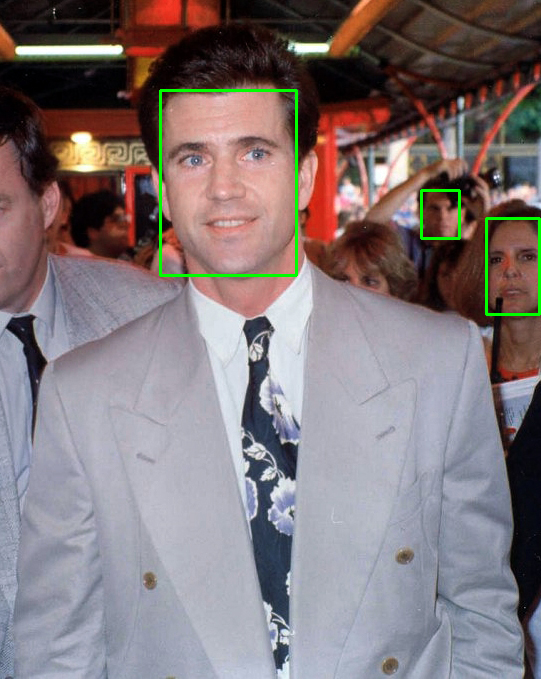

In [16]:
#for face in faces2:
bbox = faces2[2]['bbox']  # Get bounding box
#    print("Detected face:", face)

    # Draw rectangle: (x1, y1) -> (x2, y2)
cv2.rectangle(img2, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), 2)

cv2_imshow(img2)

In [17]:
emb1 = faces1[0].embedding
emb2 = faces2[2].embedding

In [18]:
cosine_similarity = np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))

In [19]:
print("Cosine Similarity:", cosine_similarity)

Cosine Similarity: 0.46204662


In [20]:
threshold = 0.5
if cosine_similarity > threshold:
    print("Cele doua fețe aparțin aceleiași persoane.")
else:
    print("Cele două fețe aparțin unor persoane diferite")

Cele două fețe aparțin unor persoane diferite


# Vizualizarea imaginilor aliniate

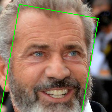

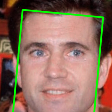

In [22]:
if len(faces1) == 0 or len(faces2) == 0:
    print("No faces detected in one or both images.")
else:
    # Extract facial landmarks
    kps1 = faces1[0].kps  # 5-point landmarks
    kps2 = faces2[2].kps

    # Perform face alignment
    aligned_face1 = face_align.norm_crop(img1, kps1, image_size=112)
    aligned_face2 = face_align.norm_crop(img2, kps2, image_size=112)

    # Display aligned faces
    cv2_imshow(aligned_face1)
    cv2_imshow(aligned_face2)